# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Kornelius Hasiholan Pardosi
- **Email:** korneliuspardosi@gmail.com
- **ID Dicoding:** korneliuspardosi

## Menentukan Pertanyaan Bisnis

- What is the total payment value grouped by the number of payment installments?
- How many orders were placed for each number of payment installments?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [8]:
!ls "/content/drive/My Drive/Colab Notebooks"

 dasboard.py		   order_payments_dataset.csv  'Proyek Analisis Data.ipynb'
 dashboard.ipynb	   order_reviews_dataset.csv    submission.zip
 order_items_dataset.csv   orders_dataset.csv	        Untitled0.ipynb


In [9]:
# Import the dataset
items_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/order_items_dataset.csv")
payments_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/order_payments_dataset.csv")
orders_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/orders_dataset.csv")


In [10]:
items_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
payments_df.head(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
orders_df.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [13]:
# Merge these 2 dataframe items_df and payments_df based on the order_id column
new1_df = pd.merge(items_df, payments_df, on='order_id', how='inner')
new1_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04


In [14]:
# Final DataFrame (Merge those 3 of DataFrame)
orders_merge_df = pd.merge(new1_df, orders_df, on='order_id', how='inner')
orders_merge_df.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,credit_card,2,72.19,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,credit_card,3,259.83,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,credit_card,5,216.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,credit_card,2,25.78,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,credit_card,3,218.04,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [15]:
orders_merge_df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date'],
      dtype='object')

**Insight:**
- Understand how to merge the data, if there is more than 1 data exist.
- Observe the columns in each dataset and how they relate to each other after the merge.

### Assessing Data

In [16]:
orders_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   order_item_id                  117601 non-null  int64  
 2   product_id                     117601 non-null  object 
 3   seller_id                      117601 non-null  object 
 4   shipping_limit_date            117601 non-null  object 
 5   price                          117601 non-null  float64
 6   freight_value                  117601 non-null  float64
 7   payment_sequential             117601 non-null  int64  
 8   payment_type                   117601 non-null  object 
 9   payment_installments           117601 non-null  int64  
 10  payment_value                  117601 non-null  float64
 11  customer_id                    117601 non-null  object 
 12  order_status                  

In [17]:
missing_value = orders_merge_df.isnull().sum()
duplicate_value = orders_merge_df.duplicated().sum()
missing_value

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
payment_sequential,0
payment_type,0
payment_installments,0


In [18]:
duplicate_value

0

**Insight:**
- Create a clear picture of the dataset's strengths and weaknesses.
- Know about the type of the data, missing value, duplicate value.

### Cleaning Data

In [19]:
missing_rows = orders_merge_df[orders_merge_df.isnull().any(axis=1)]
missing_rows.head() # Display the first few rows with missing values

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
80,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,1,voucher,1,44.11,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaN,2018-04-16 00:00:00
81,002f19a65a2ddd70a090297872e6d64e,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31,2,voucher,1,33.18,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaN,2018-04-16 00:00:00
86,00310b0c75bb13015ec4d82d341865a4,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38,1,credit_card,2,55.28,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,NaN,NaN,2018-08-29 00:00:00
268,00a99c50fdff7e36262caba33821875a,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30,1,credit_card,4,75.29,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,NaN,2018-09-18 00:00:00
278,00ae7a8b4936674ebb701d4a23719a79,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26,1,credit_card,1,37.16,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,NaN,NaN,2018-05-17 00:00:00


In [20]:
orders_merge_df.dropna(axis=0, inplace=True)

In [21]:
orders_merge_df.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
payment_sequential,0
payment_type,0
payment_installments,0


**Insight:**
- Drop the missing value in the dataset
- Improves the reliability of the results, as i am not making assumptions about missing data.

## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
orders_merge_df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
count,115018.000000,115018.000000,115018.000000,115018.000000,115018.000000,115018.000000
mean,1.196404,120.080129,19.995686,1.090699,2.936958,171.915654
std,0.699409,183.038922,15.744372,0.684409,2.772466,266.125730
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.190000
75%,1.000000,133.000000,21.180000,1.000000,4.000000,188.940000
max,21.000000,6735.000000,409.680000,26.000000,24.000000,13664.080000


**Insight:**
- Realize about the descriptive statistic such as mean, median, deviation standard, etc.

In [23]:
payment_value_by_installments = orders_merge_df.groupby('payment_installments').agg(
    total_payment_value=('payment_value', 'sum')
).reset_index()

print(payment_value_by_installments)

    payment_installments  total_payment_value
0                      0               318.57
1                      1           7558830.09
2                      2           1803251.58
3                      3           1762424.34
4                      4           1399698.35
5                      5           1157521.96
6                      6           1056374.53
7                      7            341771.60
8                      8           1515130.40
9                      9            144037.23
10                    10           2873265.97
11                    11              3113.27
12                    12             52269.30
13                    13              2546.19
14                    14              2515.94
15                    15             36800.16
16                    16              2765.57
17                    17              1221.66
18                    18             18747.12
19                    20             11729.45
20                    21          

In [24]:
# Group by payment_installments and count the number of orders
order_count_by_installments = orders_merge_df.groupby('payment_installments').agg(
    order_count=('order_id', 'count')
).reset_index()

print(order_count_by_installments)

    payment_installments  order_count
0                      0            3
1                      1        57346
2                      2        13439
3                      3        11497
4                      4         7809
5                      5         5901
6                      6         4518
7                      7         1772
8                      8         4920
9                      9          707
10                    10         6687
11                    11           25
12                    12          160
13                    13           17
14                    14           15
15                    15           89
16                    16            7
17                    17            7
18                    18           38
19                    20           20
20                    21            5
21                    22            1
22                    23            1
23                    24           34


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-25-d73d7d1b7d57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


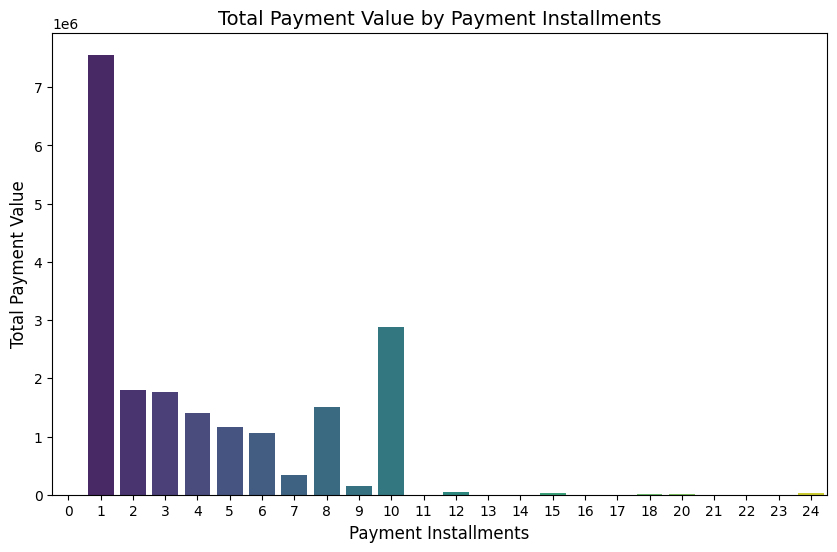

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='payment_installments',
    y='total_payment_value',
    data=payment_value_by_installments,
    palette='viridis'
)
plt.title('Total Payment Value by Payment Installments', fontsize=14)
plt.xlabel('Payment Installments', fontsize=12)
plt.ylabel('Total Payment Value', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2:

<ipython-input-26-c94946fb2722>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


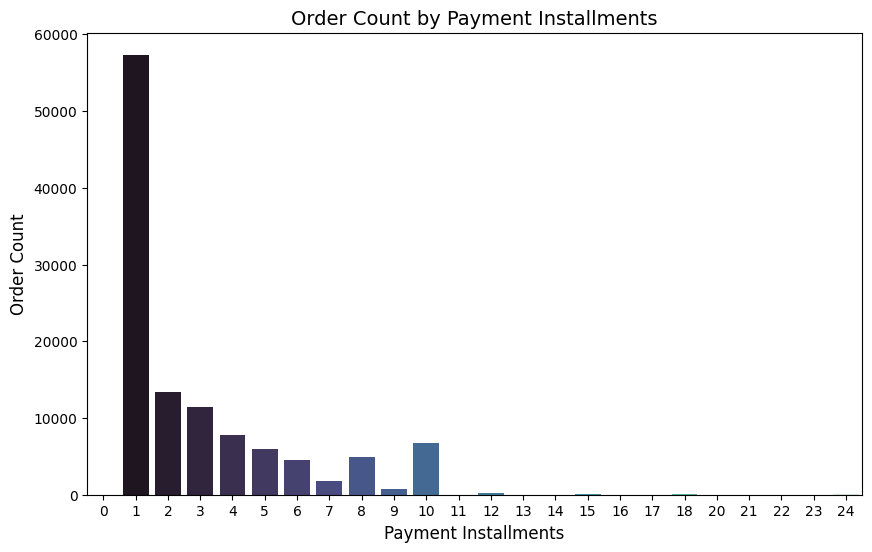

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='payment_installments',
    y='order_count',
    data=order_count_by_installments,
    palette='mako'
)
plt.title('Order Count by Payment Installments', fontsize=14)
plt.xlabel('Payment Installments', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Can identify the most popular installment plan among customers
- Can observe whether longer installment plans contribute to higher or lower payment values

## Analisis Lanjutan (Opsional)

In [27]:
import statsmodels.api as sm

In [28]:
# For statistical analysis i consider to use OLS Regression method, this method is used to predict future payment values ​​based on payment installment variable as an independent variable with 97.5% confidence interval.
# As an economics student we usually use OLS Regression for advance statistical anaylsis
model = sm.OLS(orders_merge_df['payment_value'], orders_merge_df['payment_installments']).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:          payment_value   R-squared (uncentered):                   0.305
Model:                            OLS   Adj. R-squared (uncentered):              0.305
Method:                 Least Squares   F-statistic:                          5.056e+04
Date:                Sun, 08 Dec 2024   Prob (F-statistic):                        0.00
Time:                        15:57:07   Log-Likelihood:                     -8.0456e+05
No. Observations:              115018   AIC:                                  1.609e+06
Df Residuals:                  115017   BIC:                                  1.609e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [33]:
# To check whether there is a correlation between payment installments and pament value
correlation = orders_merge_df['payment_installments'].corr(orders_merge_df['payment_value'])
print(f"Correlation between payment_installments and payment_value: {correlation}")

Correlation between payment_installments and payment_value: 0.2740637739555029


In [34]:
orders_merge_df.to_csv("orders_merge_data.csv", index=False)

## Conclusion

- Most customers prefer single-payment installments, contributing the highest payment value, indicating a strong preference for upfront payments.
- Orders with fewer payment installments (1-2) tend to have shorter delivery times, indicating efficiency in processing smaller payments.